In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and looking at first few rows
df_new = pd.read_csv('../data/cleaned.csv').drop('Unnamed: 0', axis = 1)
df_new.head(2)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,...,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,link_flair_template_id,post_hint,preview,author_cakeday,edited_on
0,datingoverthirty,[removed],t2_97llln5h,0,why is dating so fucking hard?,[],r/datingoverthirty,False,6,NaN,...,NaN,False,1678102482,1678102483,2023-03-06 11:34:28,NaN,NaN,NaN,NaN,NaN
1,datingoverthirty,[removed],t2_hineyex2,0,Trust Issues making me (30f) anxious around my...,[],r/datingoverthirty,False,6,NaN,...,NaN,False,1678088068,1678088069,2023-03-06 07:34:13,NaN,NaN,NaN,NaN,NaN


In [3]:
df_new['hidden'].nunique()

1

In [4]:
df_new['stickied'].value_counts()

False    16417
True       245
Name: stickied, dtype: int64

In [5]:
df_new.isnull().sum()

subreddit                     0
selftext                     42
author_fullname              89
gilded                        0
title                         0
                          ...  
link_flair_template_id    13430
post_hint                 15914
preview                   15914
author_cakeday            16584
edited_on                 16622
Length: 91, dtype: int64

In [6]:
#creating a new dataframe with subreddit and title columns
df = df_new[['subreddit', 'title']]
df.head(2)

,subreddit,title
0,datingoverthirty,why is dating so fucking hard?
1,datingoverthirty,Trust Issues making me (30f) anxious around my...


In [7]:
#Creating a new column title length based on title
df['title_length'] = [len(title) for title in df['title']]

In [8]:
df.head(2)

,subreddit,title,title_length
0,datingoverthirty,why is dating so fucking hard?,30
1,datingoverthirty,Trust Issues making me (30f) anxious around my...,55


In [9]:
df['title_word_count'] = [len(word) for word in df['title'].str.split(" ")]

In [10]:
df.head(2)

,subreddit,title,title_length,title_word_count
0,datingoverthirty,why is dating so fucking hard?,30,6
1,datingoverthirty,Trust Issues making me (30f) anxious around my...,55,10


In [11]:
df['title_length'].describe()

count    16662.000000
mean        49.062838
std         34.762318
min          1.000000
25%         25.000000
50%         40.000000
75%         63.000000
max        308.000000
Name: title_length, dtype: float64

In [12]:
df['title_word_count'].describe()

count    16662.000000
mean         9.089305
std          6.693990
min          1.000000
25%          5.000000
50%          7.000000
75%         12.000000
max         63.000000
Name: title_word_count, dtype: float64

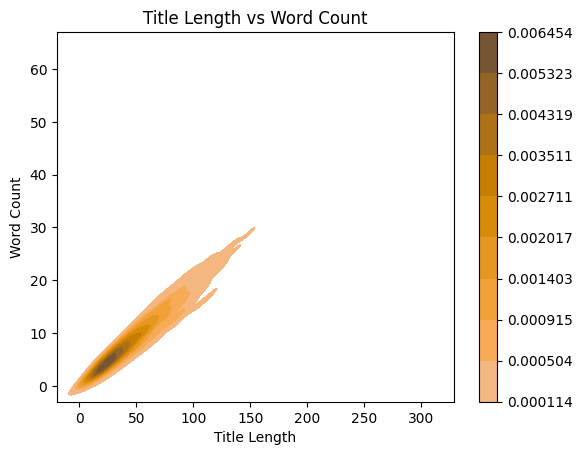

In [13]:
sns.kdeplot(df['title_length'], df['title_word_count'],
            n_levels = 10, shade = True, cbar = True, color = 'Orange')
plt.xlabel("Title Length")
plt.ylabel("Word Count")
plt.title("Title Length vs Word Count")
plt.savefig('../images/kde.jpg');

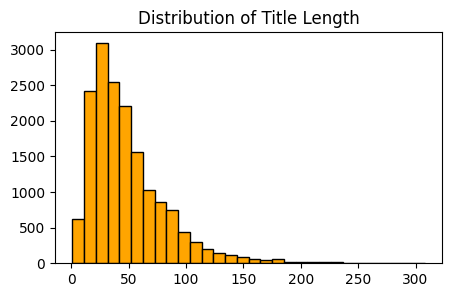

In [14]:
plt.figure(figsize = (5,3))
plt.hist(df['title_length'],bins = 30, color = 'orange',
         edgecolor = 'black')
plt.title("Distribution of Title Length");

#### From the above plot we can see that the most of the title lengths fall between 10 and 70 and there are some outliers

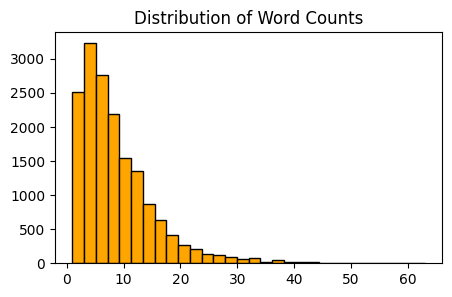

In [15]:
plt.figure(figsize = (5,3))
plt.hist(df['title_word_count'],bins = 30, color = 'orange',
         edgecolor = 'black')
plt.title("Distribution of Word Counts");

#### We can see from above plot that most of the title word count fall between 2 and 10 and to be precise 75% of the word count is below 12

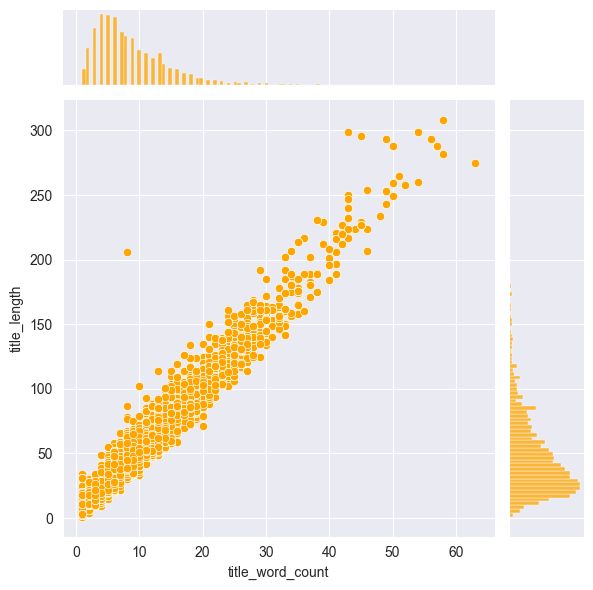

In [16]:
sns.set_style('darkgrid')
g = sns.JointGrid(df['title_word_count'], df['title_length'])
g.plot(sns.scatterplot, sns.histplot, color = 'orange')
plt.xlabel("Title Length")
plt.ylabel("Word Count");

In [17]:
#It appears that we have duplicates in our data
df[df.duplicated(['title'])]

,subreddit,title,title_length,title_word_count
58,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
105,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
157,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
199,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
204,datingoverthirty,I (30F) am looking for a responsible and polit...,85,17
...,...,...,...,...
16657,datingoverthirty,Anyone up for a D&amp;M 30F?,28,6
16658,datingoverthirty,How do you enjoy the moment?,28,6
16659,datingoverthirty,Hello Everyone Looking for Someone,34,5
16660,datingoverthirty,"[F4M] I'm new here. I wanna have some fun,chat...",149,28


In [18]:
df['subreddit'].value_counts()

datingoverthirty    9235
datingoverforty     7427
Name: subreddit, dtype: int64

In [19]:
#It appears that we have duplicates in our data
df[df.duplicated(['title'])]

,subreddit,title,title_length,title_word_count
58,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
105,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
157,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
199,datingoverthirty,"Daily sticky thread for rants, raves, celebrat...",85,13
204,datingoverthirty,I (30F) am looking for a responsible and polit...,85,17
...,...,...,...,...
16657,datingoverthirty,Anyone up for a D&amp;M 30F?,28,6
16658,datingoverthirty,How do you enjoy the moment?,28,6
16659,datingoverthirty,Hello Everyone Looking for Someone,34,5
16660,datingoverthirty,"[F4M] I'm new here. I wanna have some fun,chat...",149,28


#### We need to drop the duplicates otherwise we may misclassify the data

In [20]:
#Dropping duplicates and creating a new dataset
df1 = df.drop_duplicates(subset = ['title'] ,keep = 'first', ignore_index = False)

In [21]:
df1['subreddit'].value_counts()

datingoverthirty    5068
datingoverforty     2598
Name: subreddit, dtype: int64

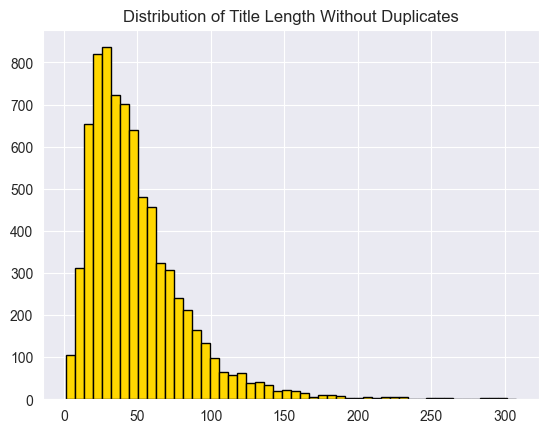

In [22]:
plt.hist(df1['title_length'],bins = 50, color = 'Gold', edgecolor = 'black')
plt.title("Distribution of Title Length Without Duplicates")
plt.savefig('../images/distribution1.jpg');

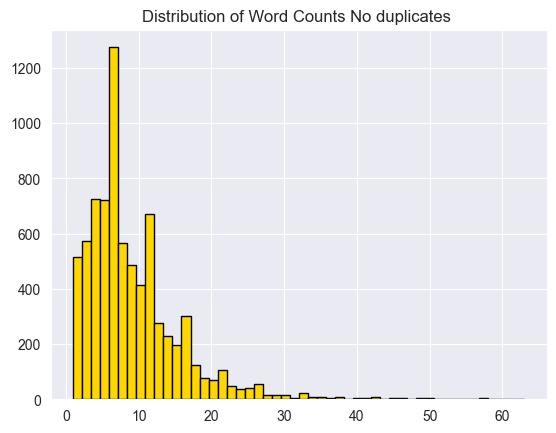

In [23]:
plt.hist(df1['title_word_count'],bins = 50, color = 'Gold', edgecolor = 'black')
plt.title("Distribution of Word Counts No duplicates ")
plt.savefig('../images/distribution2.jpg');

#### Dropping duplicated did not affect our distribution

In [24]:
#making separate datasets for further data exploration
dot = df1[df1['subreddit'] == 'datingoverthirty']

In [25]:
dot.describe()

,title_length,title_word_count
count,5068.000000,5068.000000
mean,51.782163,9.675809
std,35.140687,6.787978
min,1.000000,1.000000
25%,28.000000,5.000000
50%,44.000000,8.000000
75%,66.250000,13.000000
max,308.000000,63.000000


In [26]:
#Data over forty onlye
dof = df1[df1['subreddit'] == 'datingoverforty']

In [27]:
dof.describe()

,title_length,title_word_count
count,2598.000000,2598.000000
mean,43.784450,8.109700
std,31.412721,6.028227
min,3.000000,1.000000
25%,23.000000,4.000000
50%,35.000000,6.000000
75%,55.000000,10.000000
max,243.000000,49.000000


In [28]:
print(f'The average title length for Dating over thirty : {round(dot["title_length"].mean(),2)}')
print(f'The average title length for Dating over forty : {round(dof["title_length"].mean(),2)}')

The average title length for Dating over thirty : 51.78
The average title length for Dating over forty : 43.78


In [29]:
print(f'The average title word count for Dating over thirty : {round(dot["title_word_count"].mean(),2)}')
print(f'The average title word count for Dating over forty : {round(dof["title_word_count"].mean(),2)}')

The average title word count for Dating over thirty : 9.68
The average title word count for Dating over forty : 8.11


#### We can clearly see the differences in length and word count between different groups

In [30]:
df5 = df1.drop('subreddit', axis = 1)
df5.tail()

,title,title_length,title_word_count
10959,What dating advice would you give to your youn...,55,10
10960,"Dating fulltime after 9 years, but still alone",46,8
10961,Does the desire to date or have a relationship...,84,16
10962,"What to do, what to do...",25,6
10963,How hard it is to find a partner in 40’s,40,10


In [31]:
#Exporting data to CSV for modeling and classification
df1.to_csv('../data/df1.csv')